In [5]:
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import string
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import pandas as pd
import numpy
import gc
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from gensim.test.utils import get_tmpfile
nltk.download('stopwords')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
path = '/content/drive/My Drive/Tweets/Archive1'
path2 = '/content/drive/My Drive/Tweets/Archive2'

In [0]:
files = os.listdir(path)
files2 = os.listdir(path2)

['2020-03-29 Coronavirus Tweets.CSV',
 '2020-03-30 Coronavirus Tweets.CSV',
 '2020-03-31 Coronavirus Tweets.CSV',
 '2020-04-01 Coronavirus Tweets.CSV',
 '2020-04-02 Coronavirus Tweets.CSV',
 '2020-04-03 Coronavirus Tweets.CSV',
 '2020-04-04 Coronavirus Tweets.CSV',
 '2020-04-05 Coronavirus Tweets.CSV',
 '2020-04-06 Coronavirus Tweets.CSV',
 '2020-04-07 Coronavirus Tweets.CSV',
 '2020-04-08 Coronavirus Tweets.CSV',
 '2020-04-09 Coronavirus Tweets.CSV',
 '2020-04-10 Coronavirus Tweets.CSV',
 '2020-04-11 Coronavirus Tweets.CSV',
 '2020-04-12 Coronavirus Tweets.CSV',
 '2020-04-13 Coronavirus Tweets.CSV',
 '2020-04-14 Coronavirus Tweets.CSV',
 '2020-04-15 Coronavirus Tweets.CSV',
 '2020-04-16 Coronavirus Tweets.CSV',
 '2020-04-17 Coronavirus Tweets.CSV',
 '2020-04-18 Coronavirus Tweets.CSV',
 '2020-04-19 Coronavirus Tweets.CSV',
 '2020-04-20 Coronavirus Tweets.CSV',
 '2020-04-21 Coronavirus Tweets.CSV',
 '2020-04-22 Coronavirus Tweets.CSV',
 '2020-04-23 Coronavirus Tweets.CSV',
 '2020-04-24

In [0]:

for i in range(len(files)):
  if (i==0):
    df = pd.read_csv(path + '/' + files[i])
  else:
    df = pd.concat([df, pd.read_csv(path + '/' + files[i])])


    

In [0]:
len(df)

8642360

In [0]:
for i in range(len(files2)):
  if (i==0):
    df = pd.read_csv(path2 + '/' + files2[i])
  else:
    df = pd.concat([df, pd.read_csv(path2 + '/' + files2[i])])
len(df)

5964653

In [0]:
len(df)

5964653

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,NaN,NaN,NaN,False,False,300,0,NaN,NaN,NaN,1008,41,NaN,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,NaN,NaN,NaN,False,False,1030,1,NaN,NaN,NaN,90,316,NaN,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,False,604,0,NaN,NaN,NaN,136,457,NaN,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,NaN,NaN,NaN,False,False,1827,0,NaN,NaN,NaN,1549,170,NaN,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,NaN,NaN,NaN,False,False,723,0,NaN,NaN,NaN,868,125,NaN,2016-10-19T22:05:03Z,False,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1244059240513318918,2873456648,2020-03-29T00:30:11Z,cymm_,Can I like order plants and flowers for my por...,Twitter for iPhone,NaN,NaN,NaN,False,False,1912,0,NaN,NaN,NaN,151,86,NaN,2014-10-23T14:22:34Z,False,en
9996,1244059240882245632,560609578,2020-03-29T00:30:11Z,methusheilah,#COVID_19 #PlanetTrump\nThe Light Show With St...,Twitter Web Client,NaN,NaN,NaN,False,False,25444,0,NaN,NaN,NaN,2012,2408,NaN,2012-04-22T21:24:27Z,False,en
9997,1244059241125744640,3008550402,2020-03-29T00:30:11Z,OutlierKid,#TrumpGenocide #Covid_19 #Florida https://t.co...,Twitter for Android,NaN,NaN,NaN,True,False,157901,0,NaN,NaN,NaN,58,120,NaN,2015-02-03T01:33:36Z,False,und
9998,1244059243021508608,119135702,2020-03-29T00:30:11Z,aandrespeap,#NeumoniaAtipica y uno cuidándose del #Covid_1...,Twitter for Android,NaN,NaN,NaN,True,False,1136,0,NaN,NaN,NaN,1678,1939,NaN,2010-03-02T19:38:42Z,False,es


In [0]:
engTweets = df[df.lang == 'en']

In [0]:
len(engTweets)

4827372

In [0]:

engTweets = engTweets[engTweets.followers_count > 100]
engTweets = engTweets[engTweets.is_retweet != True]

In [0]:
len(engTweets)

3834999

In [0]:
unique = engTweets.groupby('user_id')['text'].nunique()

In [0]:
unique

user_id
13                     1
265                    3
294                    2
448                    1
531                    1
                      ..
1250083982840135683    1
1250140916180045824    1
1250256392470093824    1
1250373654619267074    1
1250414286951682050    1
Name: text, Length: 936763, dtype: int64

In [0]:
unique = pd.DataFrame(unique)
unique = unique.reindex()

In [0]:
unique

,text
user_id,
13,1
265,3
294,2
448,1
531,1
...,...
1250083982840135683,1
1250140916180045824,1
1250256392470093824,1


In [0]:
uniqueThres = unique[unique['text']>10].reset_index()
uniqueThres

,user_id,text
0,1186,23
1,1585,25
2,1688,63
3,2654,12
4,2656,14
...,...,...
59300,1245970857031131136,39
59301,1245981415784747008,32
59302,1245982102883053569,15
59303,1246565863731462144,14


In [0]:
uniqueDF = pd.DataFrame(uniqueThres['user_id'])

In [0]:
uniqueDF.to_pickle("./UserTags2.pkl")

In [0]:
usrTweets = engTweets[engTweets['user_id'].isin(uniqueThres['user_id'])]

In [0]:
usrTweets.to_pickle("/content/drive/My Drive/Tweets/usrTweets1.pkl")

In [0]:
file = open("/content/drive/My Drive/Tweets/usrTweets1.pkl",'rb')
file2 = open("/content/drive/My Drive/Tweets/usrTweets2.pkl",'rb')
usrTweets = pickle.load(file)[:]['text'].append(pickle.load(file2)[:]['text']).reset_index()

In [0]:

usrTweets

,index,text
0,2,“People are just storing up. They are staying ...
1,6,.@PatriceHarrisMD spoke with @YahooFinance abo...
2,7,First medical team aiding #Wuhan in fight agai...
3,9,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...
4,14,#CoronaUpdate | Johns Hopkins University has s...
...,...,...
3269889,355361,@APompliano @zerohedge Considering the most ca...
3269890,355372,Secondary effects of #COVID__19 part2 #Agenda2...
3269891,355380,@CP24 This is just wrong! China asked overseas...
3269892,355381,Why are you all so late to the @BorisJohnson i...


In [0]:
file = open("/content/drive/My Drive/Tweets/ids3.pkl",'rb')
ids = pickle.load(file)

In [0]:
ids

,0
0,704070213143232512
1,705499966433787904
2,707648309230436353
3,708757316590370816
4,709273228867403776
...,...
30219,340262888
30220,52166639
30221,537264113
30222,386531315


In [0]:
labels = usrTweets['index'].isin(ids)

In [0]:
labels

0          False
1          False
2          False
3          False
4          False
           ...  
3269889    False
3269890    False
3269891    False
3269892    False
3269893    False
Name: index, Length: 3269894, dtype: bool

In [0]:
for i in range(len(labels)):
  if (labels[i] == False):
     if (i%5000==0):
            print(str(i) +'/' + str(len(labels)))
     usrTweets = usrTweets.drop([i])

0/3269894


KeyboardInterrupt: ignored

In [0]:
tweetsH = usrTweets.sample(frac=1.0).reset_index()

In [0]:
tweetsH = tweetsH.drop(['level_0'], axis=1)

In [0]:
tweetsH.rename(columns={'index': 'ids'})


,ids,text
0,104966,#Coronavirus Updates\n2020-4-26 23:59 UTC\nTot...
1,12593,https://t.co/da1POQpzfd\nThe african God of ep...
2,304517,@SantaClaraPD @StJustinSchool Are there ways s...
3,527944,.@KevinLignell Gave me daily #Covid_19 data a...
4,261183,The auto industry is feeling the effects of th...
...,...,...
3269889,256160,38 samples were tested at AIIMS Bhubaneswar to...
3269890,239826,'#PharmaBro' wants out of prison to research #...
3269891,78429,Two NY #coronavirus patients TAKEN OFF ventila...
3269892,377574,Coronavirus Panel Recommends Against Use Of #H...


In [6]:
tweetsH.to_pickle("/content/drive/My Drive/Tweets/tweetsH.pkl")
tweetsH

NameError: ignored

In [0]:
file = open("/content/drive/My Drive/Tweets/tweetsH.pkl",'rb')
tweets = pickle.load(file)

In [14]:
tweets

,index,text
0,365369,Thank you for this resource @AncientSong7 ! #b...
1,517351,#DonaldTrump praises himself for saving lives ...
2,180369,@MagicMedicine27 Latest Update on #Coronavirus...
3,541659,Absolutely. We must move out of this pandemic ...
4,251516,"Sajjad Abiat, a prisoner who was wounded durin..."
...,...,...
817469,62913,Now is the time for leaders to take decisive a...
817470,302691,DilSe ❤️💙\nBritish Prime Minister #BorisJohnso...
817471,299332,There is currently “no evidence” to support th...
817472,296974,Great to see the #7pmThankYou is taking to the...


In [0]:
file = open("/content/drive/My Drive/Tweets/userTweets.pkl",'rb')
tweetsU = pickle.load(file).rename(columns={'user_id':'index'})

In [18]:
tweetsU
tweetsU

,text,index
9,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,108845320
261,#Coronavirus Cancellations: #College Visits an...,735862818180861953
612,"#RIP\n\n#Spanish #princess, 86, is the first r...",45591279
1747,"First NZ #Covid19 death on the West Coast, wom...",394994804
1956,FREE WEBINAR: International Students &amp; Col...,106211314
...,...,...
354302,"Thanks to #Covid19, apparently Mark Cuban has ...",4426557017
354478,More positive progress. Guidelines for busines...,6817032
354839,Breaking News: Channel Islands Harbor in #Oxna...,32470325
354956,CMS issues explanatory guidance on #StarkLaw b...,154630902


In [19]:
tweetsA = tweets.append(tweetsU)
tweetsA.reset

,index,text
0,365369,Thank you for this resource @AncientSong7 ! #b...
1,517351,#DonaldTrump praises himself for saving lives ...
2,180369,@MagicMedicine27 Latest Update on #Coronavirus...
3,541659,Absolutely. We must move out of this pandemic ...
4,251516,"Sajjad Abiat, a prisoner who was wounded durin..."
...,...,...
354302,4426557017,"Thanks to #Covid19, apparently Mark Cuban has ..."
354478,6817032,More positive progress. Guidelines for busines...
354839,32470325,Breaking News: Channel Islands Harbor in #Oxna...
354956,154630902,CMS issues explanatory guidance on #StarkLaw b...


In [0]:
tweetsA = tweetsA.reset_index()

In [0]:
stopWords = nltk.corpus.stopwords.words('english')
#using snowballstemmer for lemmatization
stemmer = SnowballStemmer("english")

docCount = {}
wordCount = {}

def tokenize(text, i):
    
    # remove all non alphabet  wasn't sure from the assignment if you wanted just special characters 
    #removed or all non alphabet (i.e. numbers), so here i removed all non-alphabet characters
    words = re.sub("[^a-zA-Z]+", ' ', text)
    ## remove extra spaces and tokenize
    words = re.sub('\s+', ' ', text).split(" ")

    
    ## remove stopwords
    temp = [] 
    for r in words: 
        r = r.lower()
        r = r.translate(str.maketrans('', '', string.punctuation))
        r = r.translate(str.maketrans('', '', string.digits))
        #remove emojis/ non ascii chars
        r = r.encode('ascii', 'ignore').decode('ascii')
        if len(r) > 3:
            if not r in stopWords: 
                temp.append(r) 
                
              
    words = temp
    
    ## stem words
    singles = [stemmer.stem(w) for w in words]

    return singles

def tokenSet(text):
    rem = string.punctuation
    pattern = r"[{}]".format(rem)

    chars = ['\n', '\xa0', '\t']
    text = text.str.replace(pattern, '')
    for i in range(len(chars)):
        text = text.replace({chars[i]:''}, regex=True)
    
    tokens = [''] * len(text)
    for i in range(len(text)):
        if (i%5000==0):
            print(str(i) +'/' + str(len(text)))
        tokens[i] = tokenize(str(text[i]), i)
    return tokens

In [33]:
tokens2 = tokenSet(tweetsA['text'])
tokens2


0/847736
5000/847736
10000/847736
15000/847736
20000/847736
25000/847736
30000/847736
35000/847736
40000/847736
45000/847736
50000/847736
55000/847736
60000/847736
65000/847736
70000/847736
75000/847736
80000/847736
85000/847736
90000/847736
95000/847736
100000/847736
105000/847736
110000/847736
115000/847736
120000/847736
125000/847736
130000/847736
135000/847736
140000/847736
145000/847736
150000/847736
155000/847736
160000/847736
165000/847736
170000/847736
175000/847736
180000/847736
185000/847736
190000/847736
195000/847736
200000/847736
205000/847736
210000/847736
215000/847736
220000/847736
225000/847736
230000/847736
235000/847736
240000/847736
245000/847736
250000/847736
255000/847736
260000/847736
265000/847736
270000/847736
275000/847736
280000/847736
285000/847736
290000/847736
295000/847736
300000/847736
305000/847736
310000/847736
315000/847736
320000/847736
325000/847736
330000/847736
335000/847736
340000/847736
345000/847736
350000/847736
355000/847736
360000/847736
365

[['thank',
  'resourc',
  'ancientsong',
  'birthingsupport',
  'thrivenj',
  'covid',
  'httpstcoayxjcqcsk'],
 ['donaldtrump',
  'prais',
  'save',
  'live',
  'ban',
  'peopl',
  'china',
  'europ',
  'come',
  'reduc',
  'number',
  'infect',
  'ultim',
  'number',
  'fatal',
  'trumppressconf',
  'coronavirus'],
 ['magicmedicin', 'latest', 'updat', 'coronavirusoutbreak', 'httpstcojkcmbt'],
 ['absolut',
  'must',
  'move',
  'pandem',
  'traumainform',
  'mindset',
  'workplac',
  'level',
  'educ',
  'social',
  'interact',
  'kid',
  'especi',
  'negat',
  'affect',
  'crisi',
  'must',
  'help',
  'heal',
  'mitig',
  'damag',
  'covid',
  'httpstcoxxqtbrror'],
 ['sajjad',
  'abiat',
  'prison',
  'wound',
  'prison',
  'riot',
  'late',
  'march',
  'conditionsdi',
  'hospit',
  'today',
  'dozen',
  'prison',
  'ahvazsw',
  'iran',
  'kill',
  'author',
  'open',
  'fire',
  'detaine',
  'fear',
  'would',
  'becom',
  'sick',
  'covid',
  'httpstcoelzoevk',
  'httpstcovtlibhxo

In [0]:
tweetsA.to_pickle("/content/drive/My Drive/Tweets/tweetsA.pkl")


In [0]:
np.save('/content/drive/My Drive/Tweets/tokensA.npy', tokens2, True)

In [0]:
tokens1.to_pickle("/content/drive/My Drive/Tweets/tokens4.pkl")

In [0]:
tokens = np.load('/content/drive/My Drive/Tweets/tokens5.npy', allow_pickle=True)
tokens

array([list(['trump', 'offici', 'push', 'agenc', 'pursu', 'unsubstanti', 'conspiraci', 'theori', 'covid', 'origin', 'chines', 'httpstcoscqzhw']),
       list(['wipe', 'whatev', 'dont', 'know', 'touch', 'return', 'shelfgroceri', 'alway', 'wash', 'without', 'covid', 'httpstcomcxmhivv']),
       list(['covid', 'mani', 'brain', 'overtask', 'experienc', 'anxieti', 'feel', 'lack', 'control', 'there', 'much', 'inform', 'process', 'troubl', 'think', 'great', 'piec', 'understoodorg', 'medium', 'httpstcohztog', 'parent', 'adhd']),
       ...,
       list(['world', 'autism', 'awar', 'especi', 'poignant', 'year', 'happen', 'amid', 'coronavirus', 'crisi', 'employ', 'call', 'deeper', 'understand', 'need', 'employe', 'neurodivers', 'famili', 'member', 'divers', 'inclus', 'httpstcoxikkdgbbp']),
       list(['member', 'ghwnetwork', 'world', 'health', 'worker', 'week', 'upload', 'testimoni', 'tell', 'policymak', 'healthworkerscount', 'find', 'whwweek', 'portalhttpstcopflffnwocovid', 'httpstcohanlvzrji']

In [0]:
file = open("/content/drive/My Drive/Tweets/tokens1.pkl",'rb')
file2 = open("/content/drive/My Drive/Tweets/tokens2.pkl",'rb')
file3 = open("/content/drive/My Drive/Tweets/tokens3.pkl",'rb')
file4 = open("/content/drive/My Drive/Tweets/tokens4.pkl",'rb')

In [0]:
tokens = pickle.load(file).append(pickle.load(file2))#.append(pickle.load(file3)).append(pickle.load(file4))

In [0]:
tokens1 = [''] * len(tokens[:100])
for i in range(len(tokens[:100])):
  if (i%100000==0):
            print(str(i) +'/' + str(len(tokens)))
  temp = [] 

  for r in tokens.iloc[[i]].dropna(axis='columns').values:
    temp.append(r)
  tokens1[i] = temp

0/1000000


In [0]:
tokens.save('tokensNP1', tokens1) 

array([['patriceharrismd', 'spoke', 'yahoofin', 'covid', 'stimulus',
        'packag', 'make', 'congress', 'healthcar', 'landscap', 'chang',
        'pandem', 'end', 'httpstcoybfjwraih']], dtype=object)

In [0]:
tokens1

[[array(['peopl', 'store', 'stay', 'home', 'freez', 'thing', 'talk',
         'dealer', 'around', 'state', 'area', 'freezer', 'said', 'owner',
         'frank', 'mertzhttpstcogsqghmqjskqdsfox', 'minneapoli', 'covid',
         'coronavirus'], dtype=object)],
 [array(['patriceharrismd', 'spoke', 'yahoofin', 'covid', 'stimulus',
         'packag', 'make', 'congress', 'healthcar', 'landscap', 'chang',
         'pandem', 'end', 'httpstcoybfjwraih'], dtype=object)],
 [array(['first', 'medic', 'team', 'aid', 'wuhan', 'fight', 'epidem',
         'complet', 'mission', 'covid', 'coronavirusoutbreak',
         'httpstcozeeaipsk'], dtype=object)],
 [array(['kathygriffin', 'realdonaldtrump', 'lie', 'coronavirus', 'test',
         'httpstcojzpbra', 'covid', 'lgbt'], dtype=object)],
 [array(['coronaupd', 'john', 'hopkin', 'univers', 'said', 'author', 'logo',
         'report', 'titl', 'covid', 'india', 'updatesdtrip', 'report',
         'httpstconjxfvvon'], dtype=object)],
 [array(['singapor', 'donat

In [0]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokens2)]

In [0]:
modelD2V = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [0]:
modelD2V.train(documents, total_examples=modelD2V.corpus_count, epochs=20, start_alpha=0.002, end_alpha=-0.016)

In [0]:
pca = PCA(n_components=2).fit(modelD2V.docvecs.doctag_syn0)
datapoint = pca.transform(modelD2V.docvecs.doctag_syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


In [0]:
datapoint

array([[ 0.3350595 ,  0.13352498, -0.0277983 ],
       [-0.5078291 ,  0.145257  ,  0.08509637],
       [-0.6534068 , -0.0781559 ,  0.06553865],
       ...,
       [-0.45178768,  0.03417582,  0.1565554 ],
       [ 1.9934337 ,  0.20419908,  0.11254147],
       [ 0.5417342 , -0.20332189, -0.13356411]], dtype=float32)

In [0]:
np.save('/content/drive/My Drive/Tweets/datapoints.npy', datapoint, True)

In [0]:
dps = np.load('/content/drive/My Drive/Tweets/datapoints.npy', allow_pickle=True)

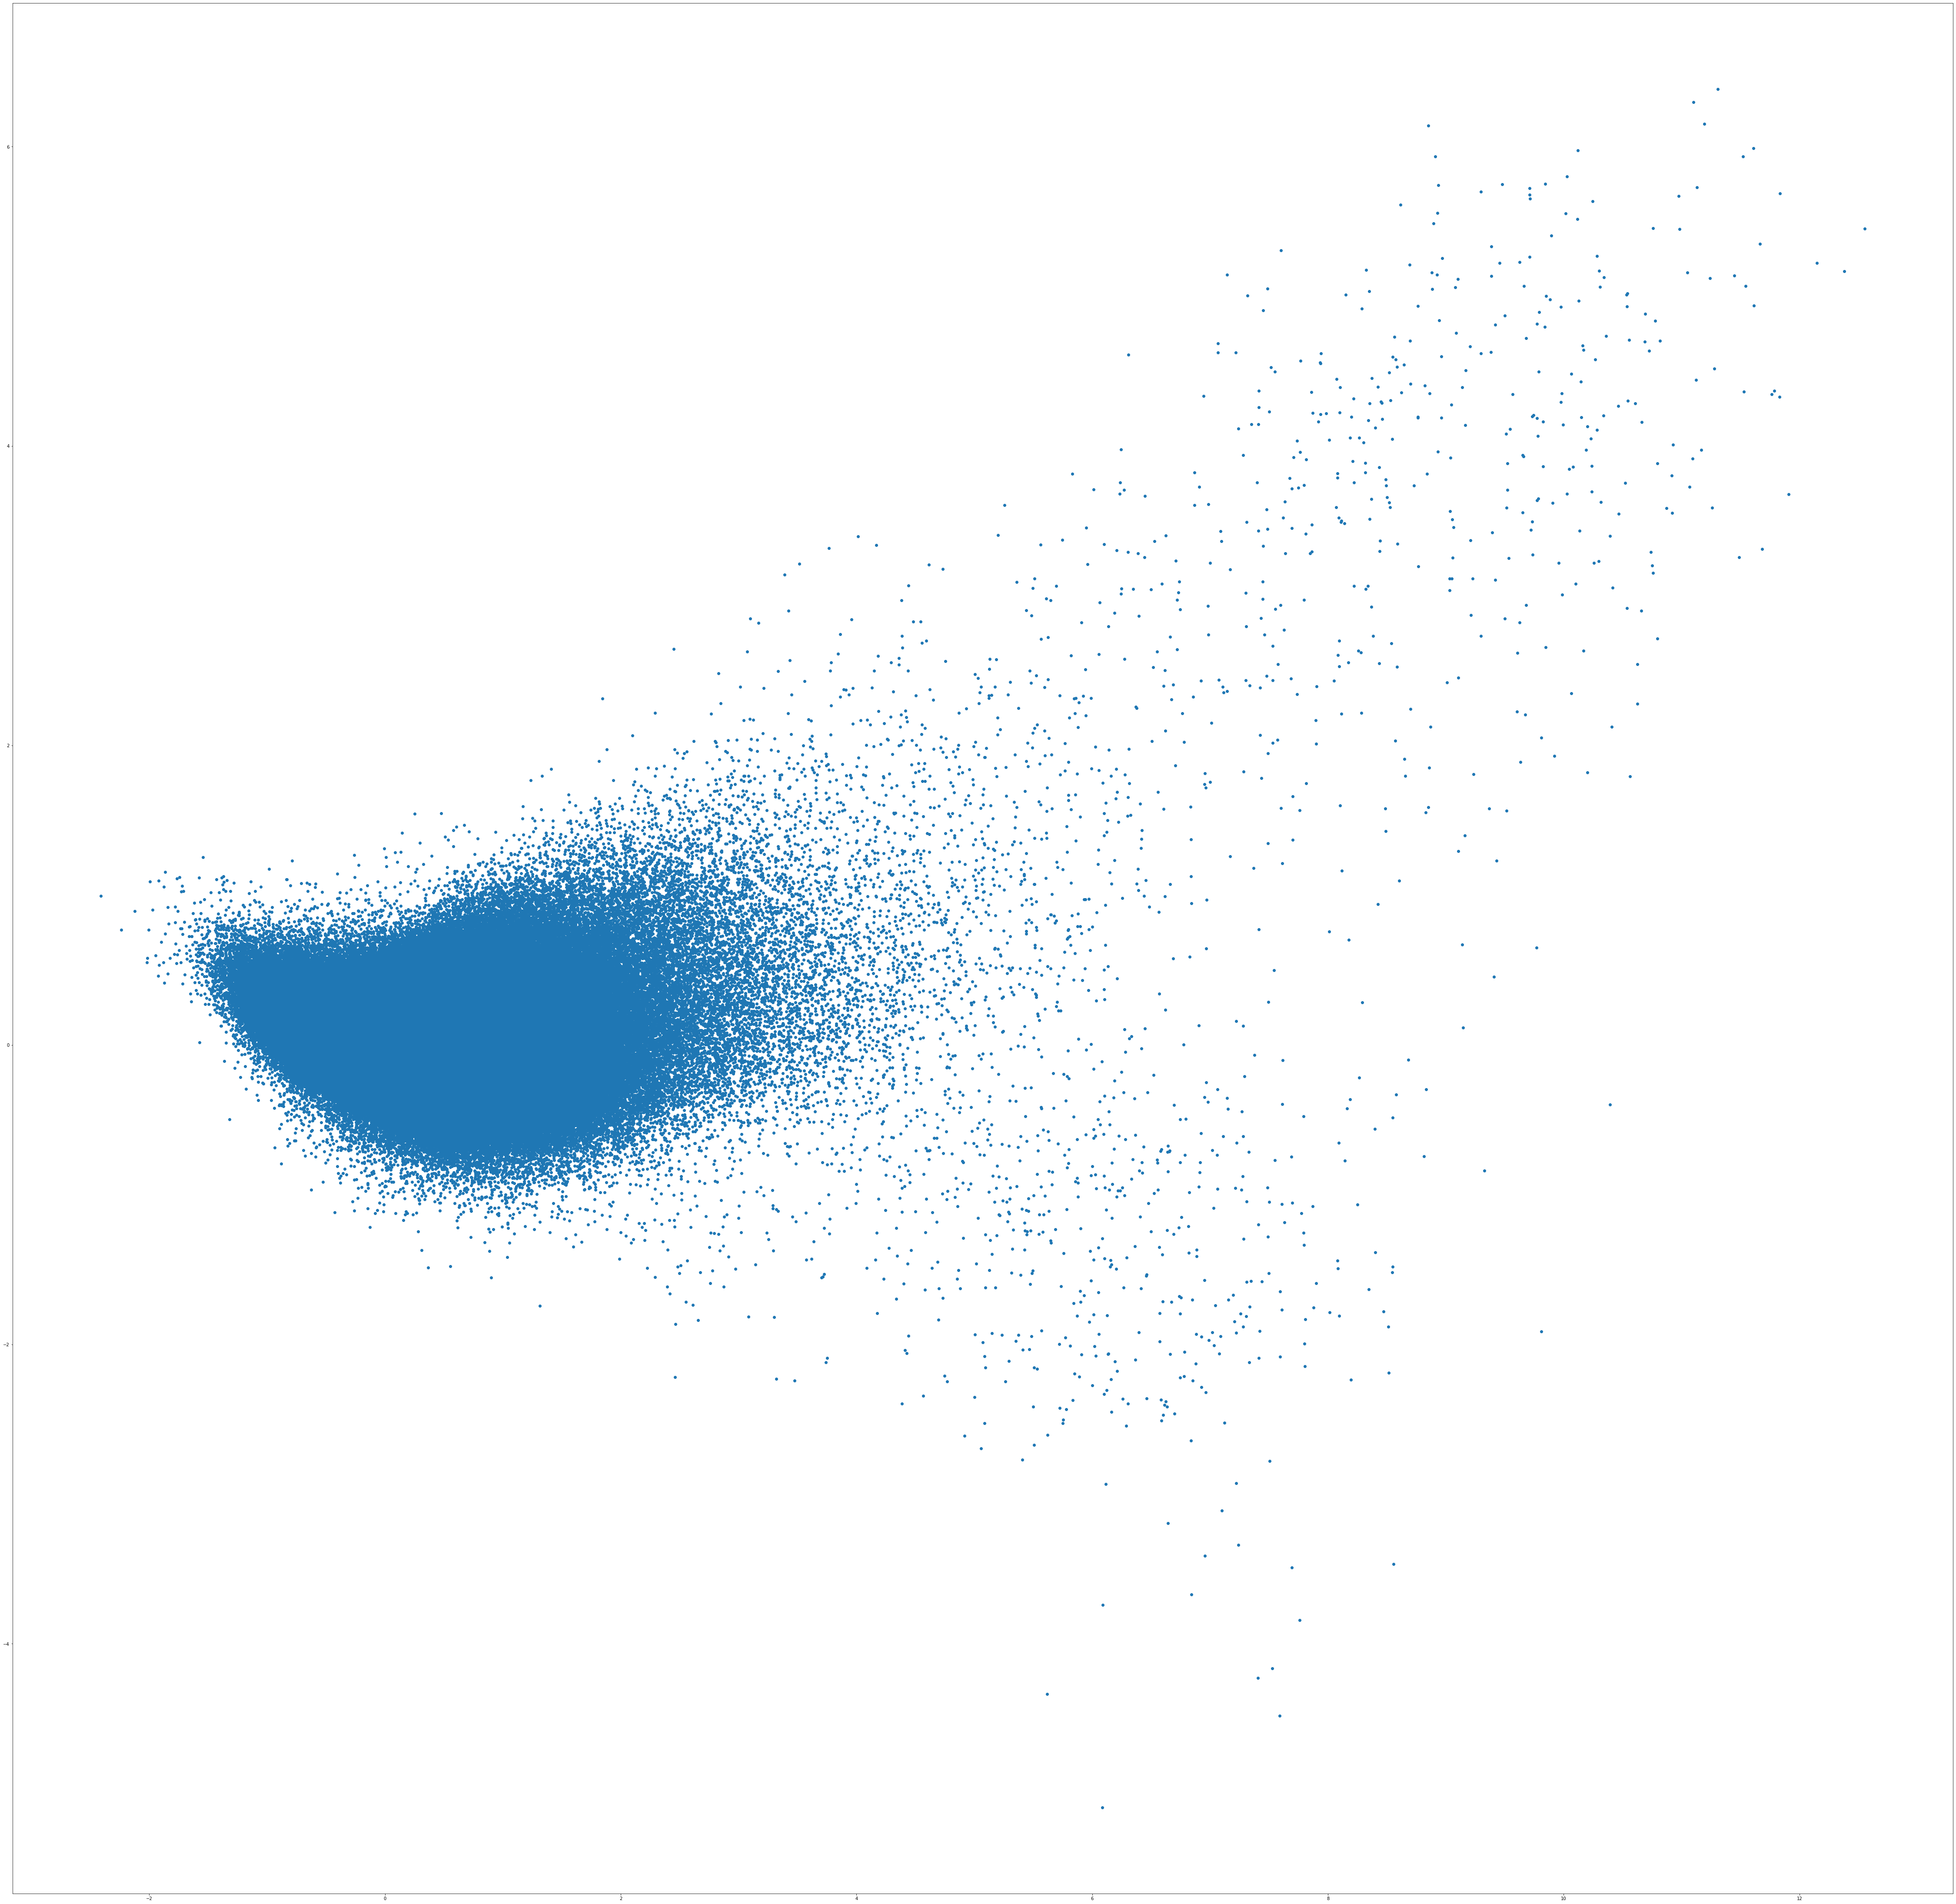

In [0]:
plt.figure(figsize=[80,80])
plt.scatter(datapoint[:, 0], datapoint[:, 1])
plt.show()

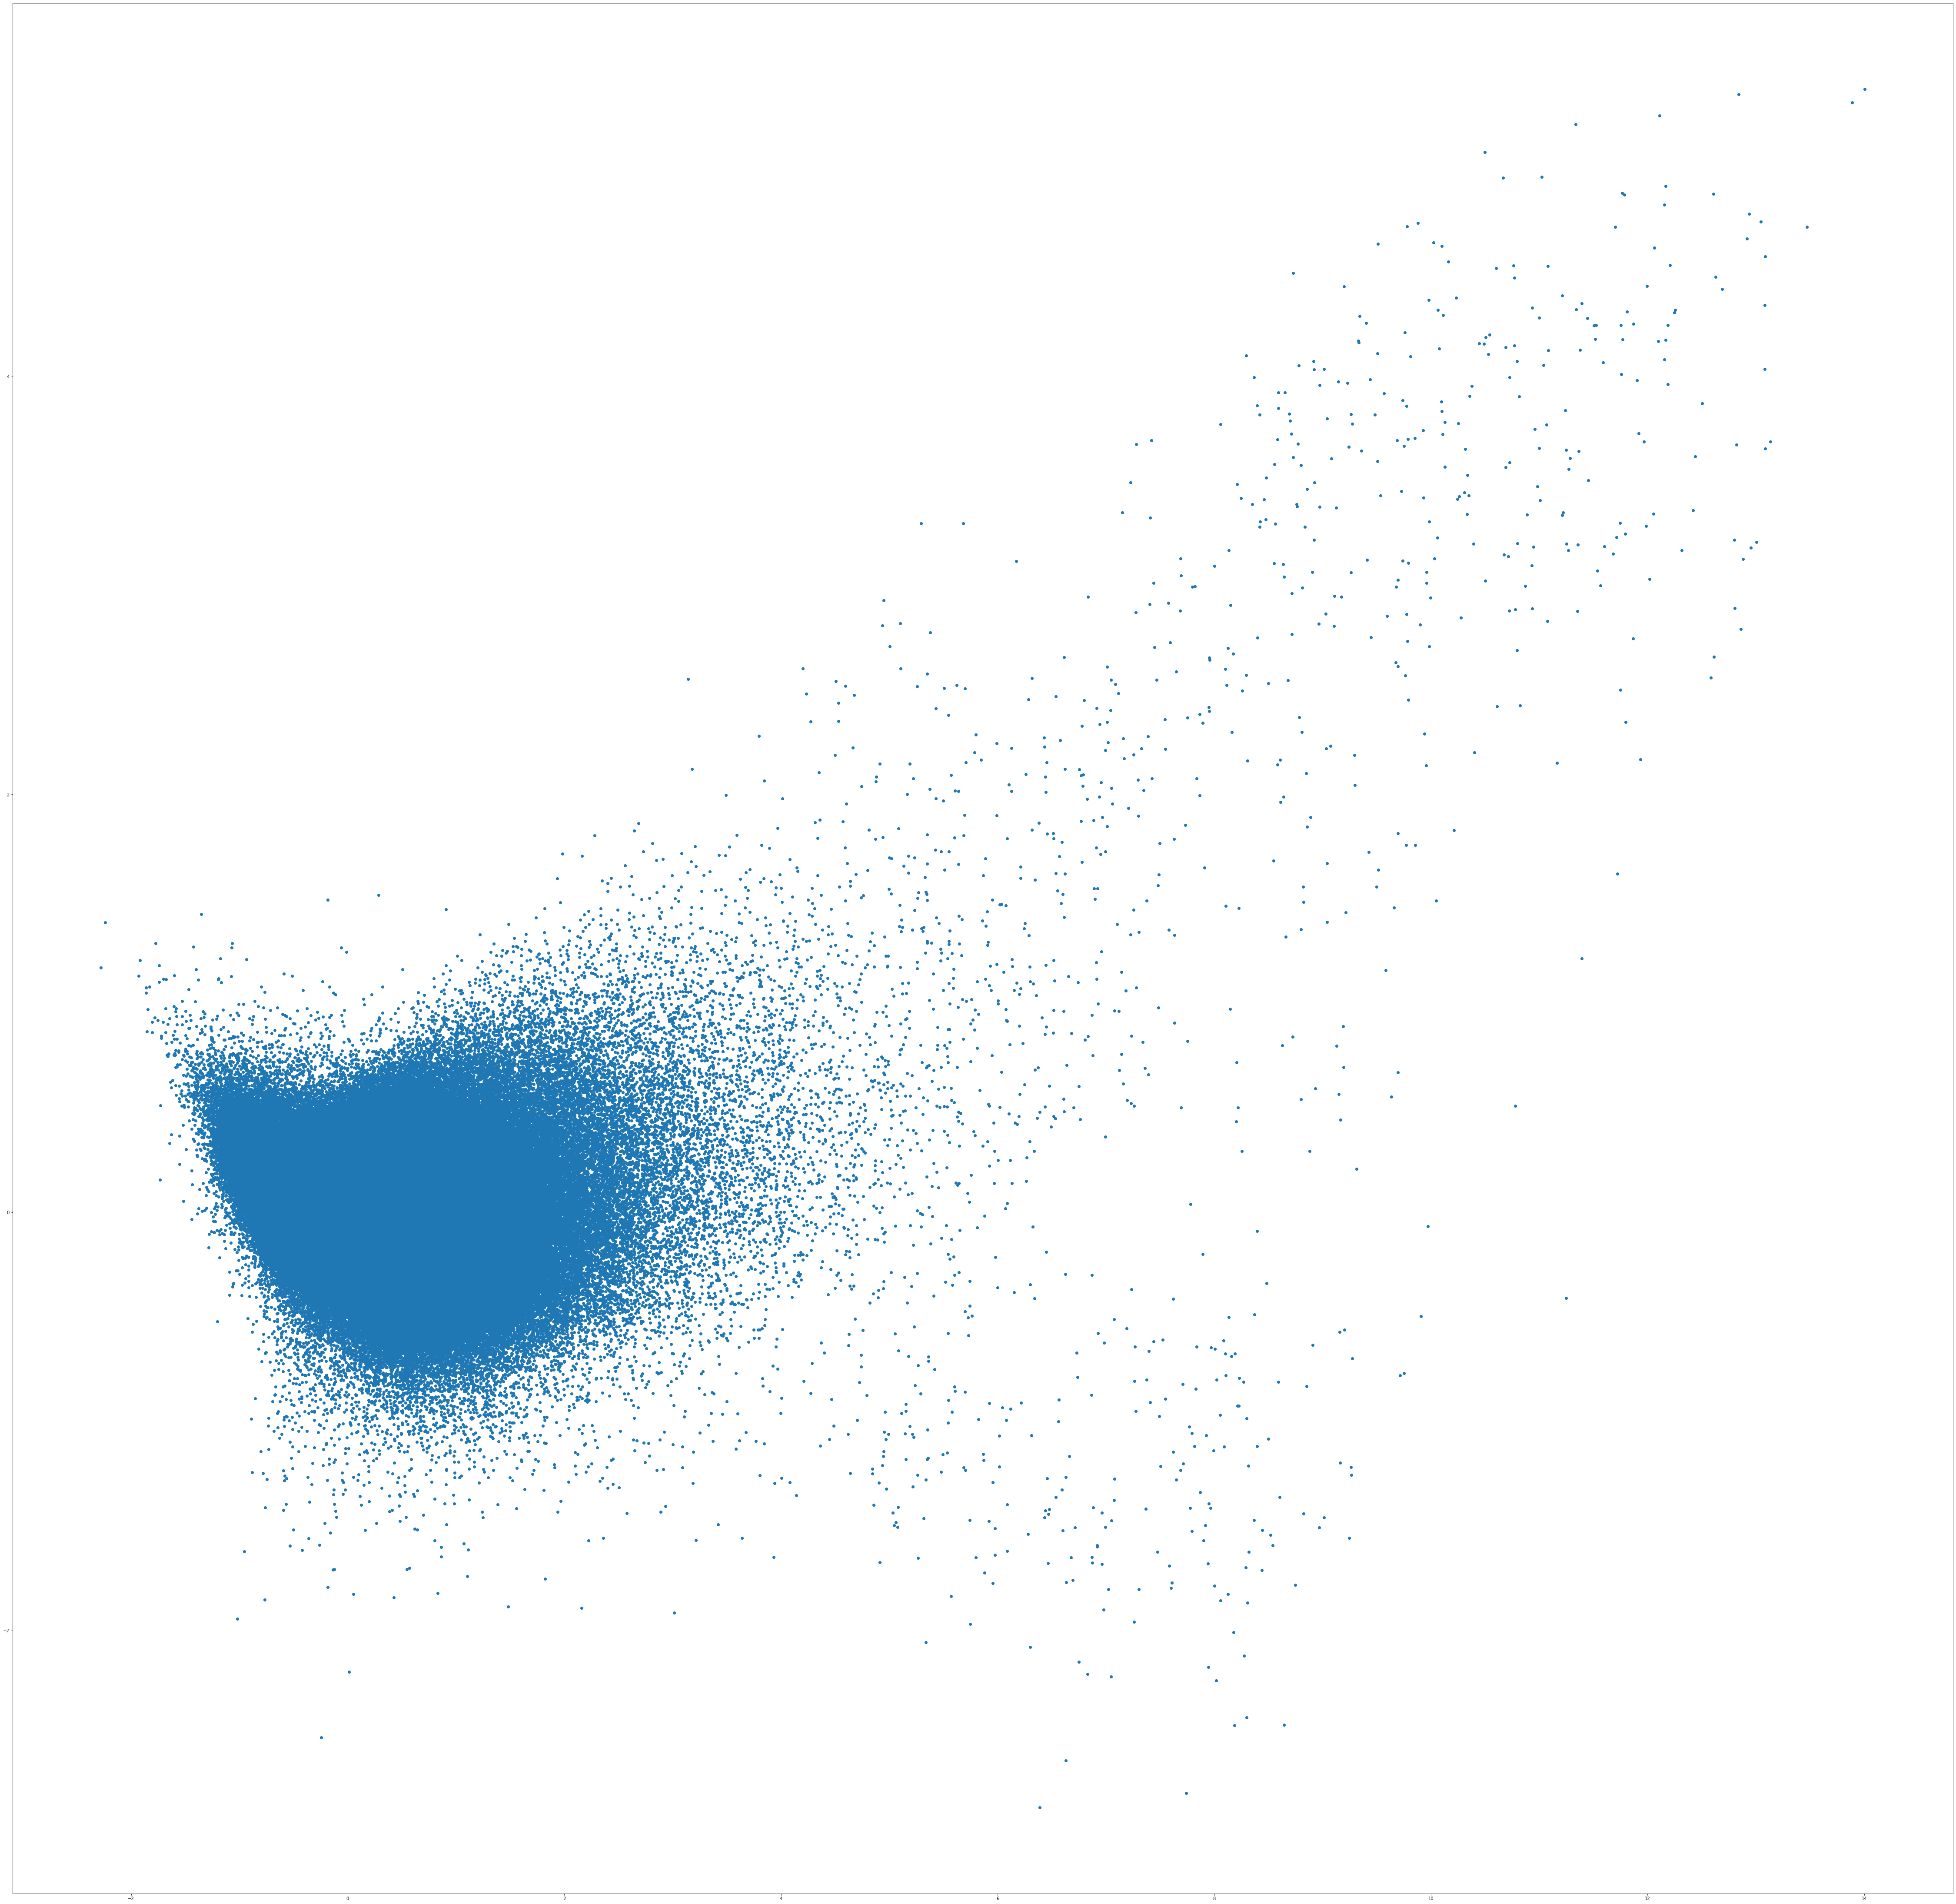

In [0]:
plt.figure(figsize=[80,80])
plt.scatter(dps[:, 0], dps[:, 1])
plt.show()

In [40]:
modelD2V.save("/content/drive/My Drive/Tweets/modelD2VA.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


NameError: ignored

In [0]:
model2 = Doc2Vec.load("/content/drive/My Drive/Tweets/modelD2V3.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
pca = PCA(n_components=3).fit(model2.docvecs.doctag_syn0)
datapoint = pca.transform(model2.docvecs.doctag_syn0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  


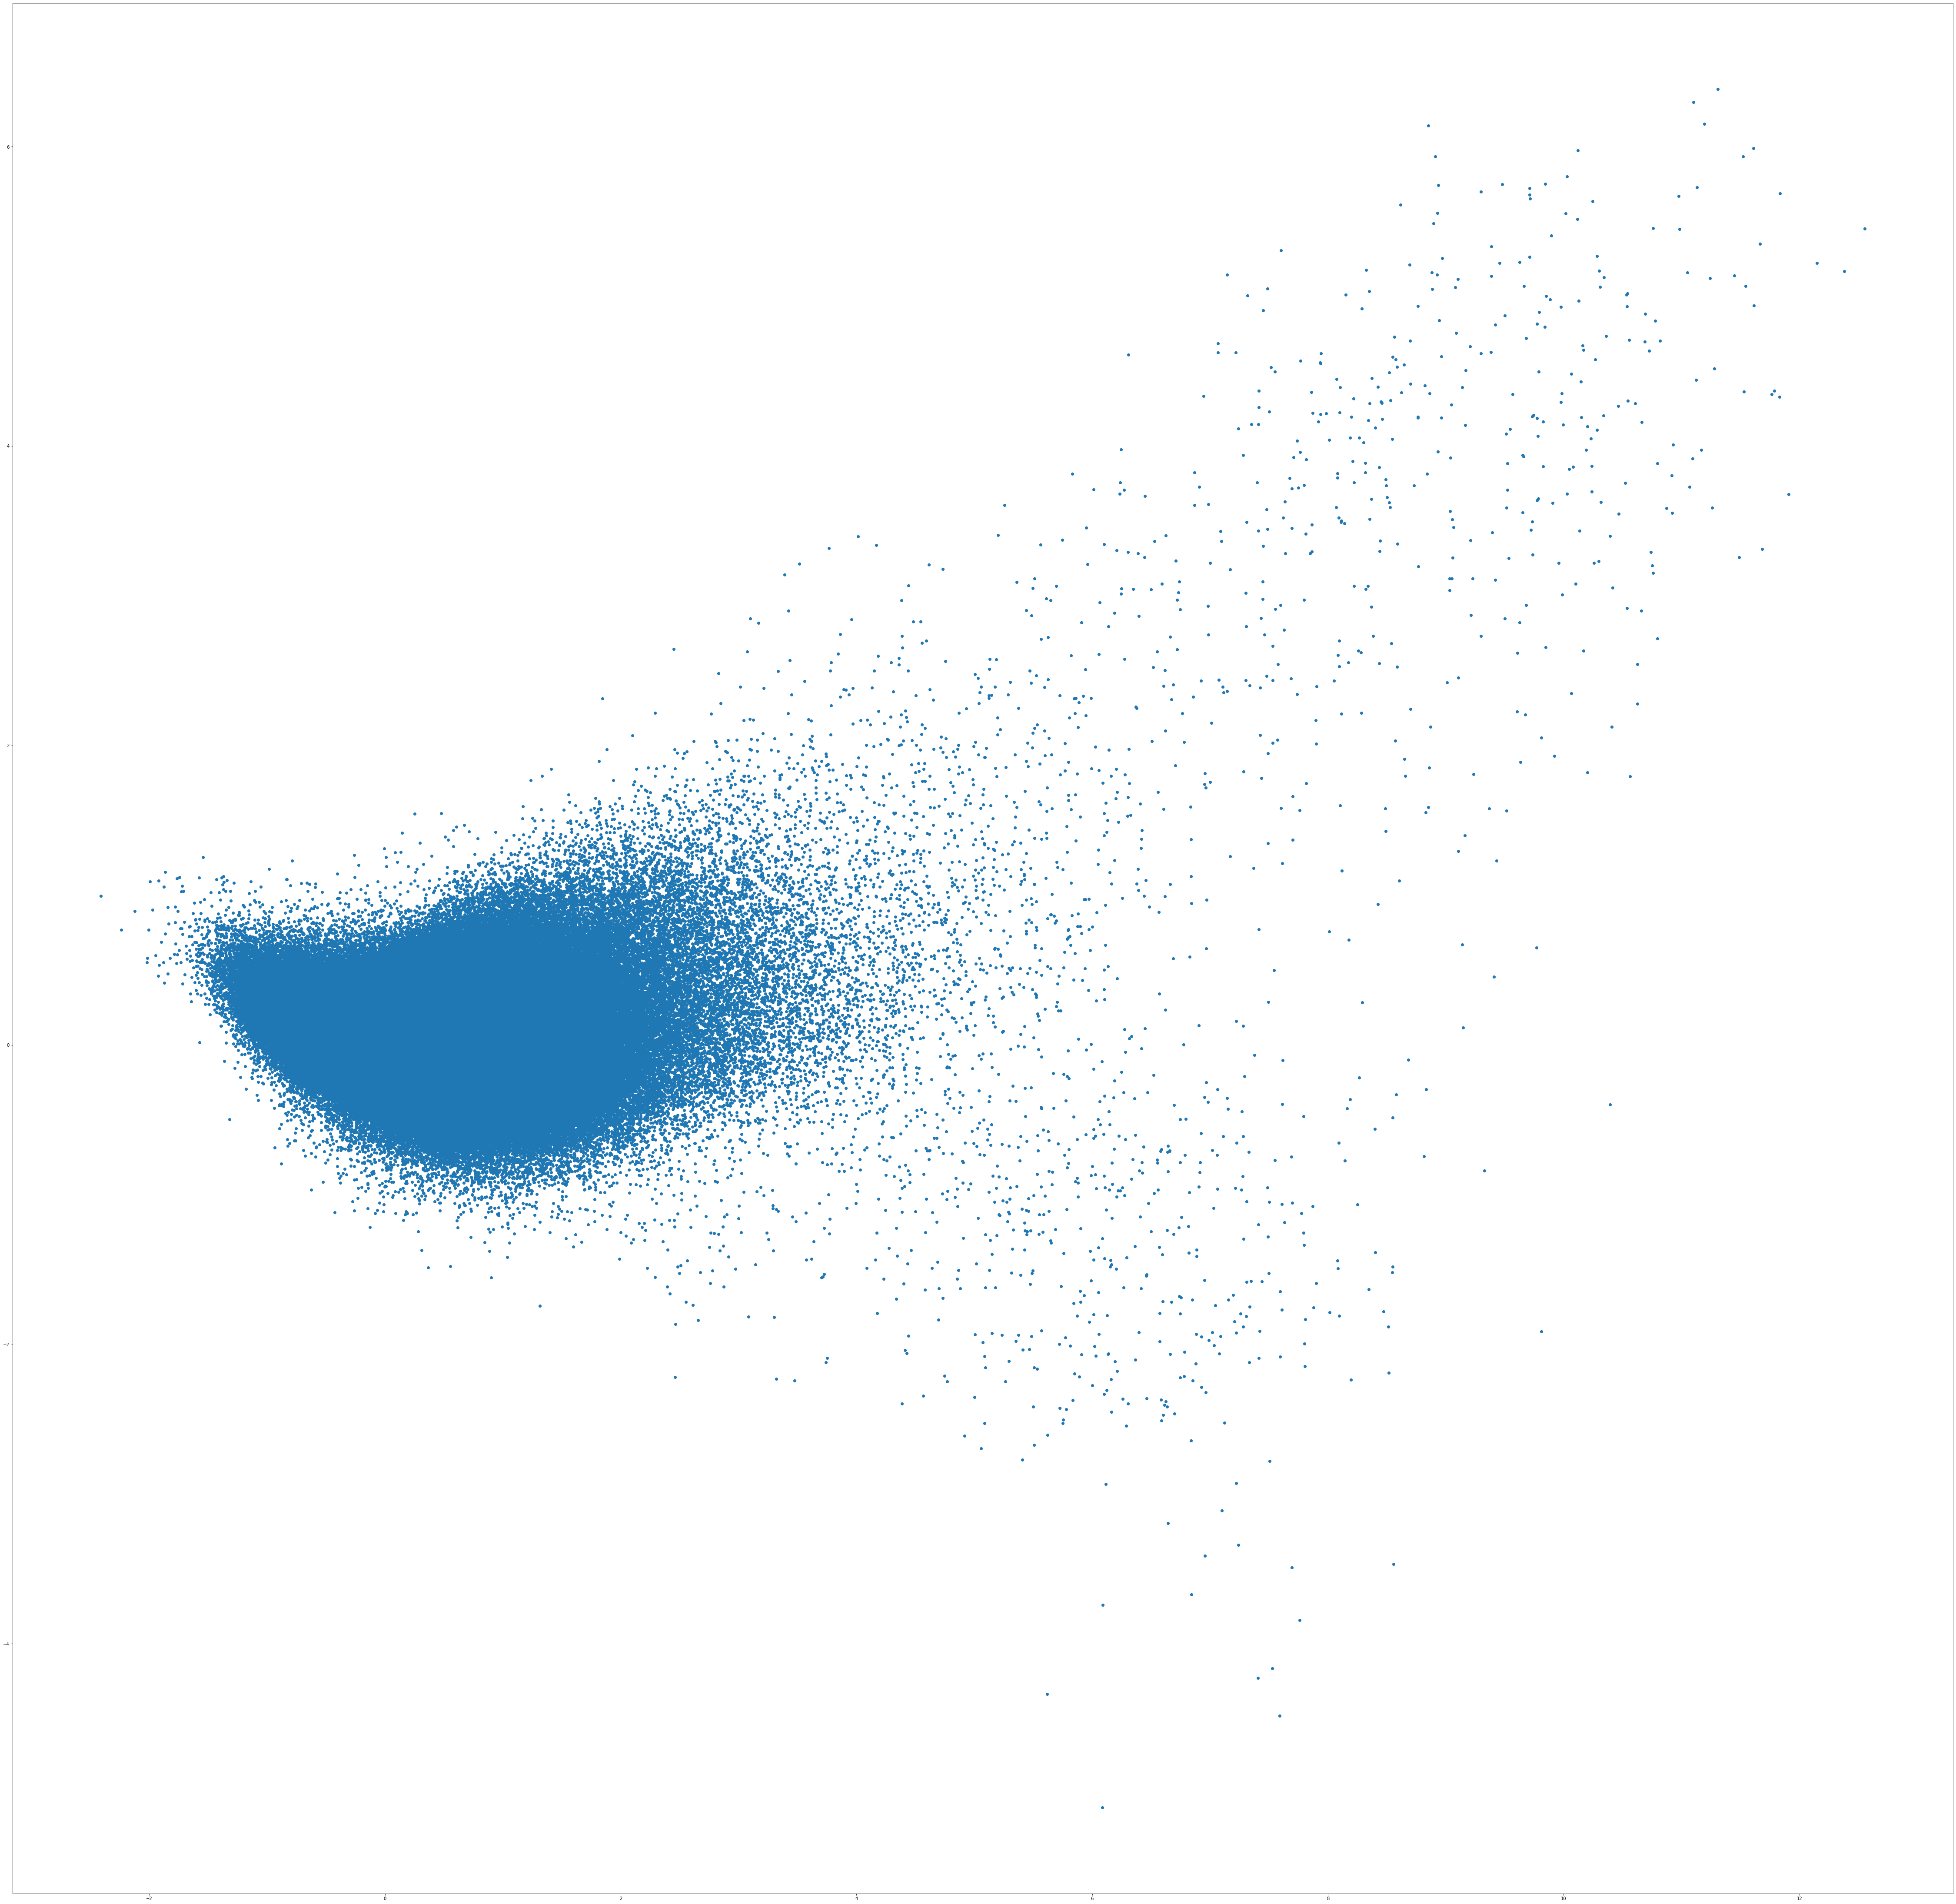

In [0]:
plt.figure(figsize=[80,80])
plt.scatter(datapoint[:, 0], datapoint[:, 1])
plt.show()

In [49]:
tokensC = np.load('/content/drive/My Drive/Tweets/tokensC5.npy', allow_pickle=True)
tokensC

array([list(['stay', 'healthi', 'mental', 'physic', 'covid', 'crisisa', 'messag', 'wsma', 'wahospit', 'pleas', 'sharewsmaceo', 'govinsle', 'wadepthealth', 'kingcountym', 'kcpubhealth', 'docjeffd', 'snocountywahealthcar', 'tpchd', 'wcaap', 'httpstcohwnbki']),
       list(['terryglavin', 'rolandpari', 'nspector', 'nytim', 'clivechamilton', 'cburton', 'fredlitwin', 'raykwong', 'vshih', 'gordongchang', 'davidmulroney', 'globeandmail', 'nvanderklipp', 'cafreeland', 'rorymedcalf', 'ralphgoodal', 'justintrudeau', 'csiscanada', 'asio', 'aaronfriedberg', 'elyratn', 'fenellasung', 'washingtonpost', 'drbeeze', 'michaelauslen', 'colinfreez', 'honjohnmccallum', 'ianjamesyoung', 'canadachina', 'canadafp', 'csis', 'csecst', 'nsagov', 'dhsgov', 'gchq', 'stevenchas', 'torontostar', 'nationalpost', 'jmohanmalik', 'michaeldanbymp', 'thejusticedept', 'whnsc', 'billblair', 'safetycanada', 'ncsc', 'post', 'base', 'piec', 'cburton', 'vital', 'justintrudeau', 'reject', 'huaweig', 'time', 'covid', 'httpstcoxzn

In [45]:
import pandas as pd
import json
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import numpy as np
import string
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
import nltk
import gensim
from nltk.stem.snowball import SnowballStemmer
import re
import string
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import pandas as pd
import numpy
import gc
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from gensim.test.utils import get_tmpfile
nltk.download('stopwords')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
common_dictionary = Dictionary(tokensC)
common_corpus = [common_dictionary.doc2bow(token) for token in tokensC]

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=common_corpus,
                                           id2word=common_dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
for i in range(5):
    print(lda_model.print_topics()[i])
    print('...')

(0, '0.019*"covid" + 0.008*"coronavirus" + 0.004*"dont" + 0.003*"data" + 0.003*"help" + 0.003*"need" + 0.003*"health" + 0.003*"follow" + 0.002*"communiti" + 0.002*"updat"')
...
(1, '0.019*"covid" + 0.005*"coronavirus" + 0.004*"good" + 0.003*"case" + 0.003*"test" + 0.003*"help" + 0.003*"live" + 0.003*"patient" + 0.003*"trump" + 0.003*"worker"')
...
(2, '0.021*"covid" + 0.008*"coronavirus" + 0.004*"pleas" + 0.004*"lockdown" + 0.004*"death" + 0.003*"april" + 0.003*"stayhom" + 0.002*"give" + 0.002*"stay" + 0.002*"trump"')
...
(3, '0.013*"covid" + 0.009*"coronavirus" + 0.002*"thank" + 0.002*"news" + 0.002*"keep" + 0.002*"like" + 0.002*"report" + 0.002*"come" + 0.002*"tri" + 0.002*"featur"')
...
(4, '0.018*"covid" + 0.009*"coronavirus" + 0.002*"live" + 0.002*"time" + 0.002*"govern" + 0.002*"resourc" + 0.002*"state" + 0.001*"check" + 0.001*"narendramodi" + 0.001*"podcast"')
...
